In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from IPython.display import display

In [152]:
# Pascal's triangle

factorialsCache = {}
def factorial(n):
    if n <= 1:
        return 1
    
    key = str(n)
    if key in factorialsCache:
        return factorialsCache[key]
    
    solution = n * factorial(n - 1)
    factorialsCache[key] = solution
    return solution

def binomial(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

def pascalRow(rowNum):
    solution = []
    for i in range(rowNum + 1):
        solution.append(binomial(rowNum, i))
    return solution

def pascalTriangle(numberOfRows):
    rows = []
    for n in range(numberOfRows):
        row = pascalRow(n)
        while len(row) < numberOfRows:
            row.append(0)
        rows.append(row)
    return np.array(rows)

def formatPascalTriangle(numberOfRows):
    triangle = pascalTriangle(numberOfRows)
    length = len(triangle)
    maxDigits = int(np.log10(np.max(triangle))) + 1
    maxDigits = maxDigits - maxDigits % 2 + 1
    
    rows = []
    for rowNum in range(len(triangle)):
        formatted = formatRow(triangle, rowNum, maxDigits, length)
        rows.append(formatted)
    return rows

def formatRow(triangle, rowNum, maxDigits, length):
    row = triangle[rowNum]
    rowStr = ''
    for n in row:
        if n > 0:
            digits = int(np.log10(n)) + 1
            padding = maxDigits - digits + 1
            if len(rowStr) == 0:
                padding = 0
            rowStr = rowStr + (' ' * padding) + str(int(n))
        else:
            break
    lengthToAdd = (maxDigits * length + length - 1) - len(rowStr)
    half = lengthToAdd // 2
    return (' ' * half) + rowStr + (' ' * (half + lengthToAdd % 2))

In [111]:
numberOfRowsPrompt = widgets.IntText(
    value=3,
    description='Rows:',
    disabled=False
)

In [153]:
display(numberOfRowsPrompt)
for row in formatPascalTriangle(numberOfRowsPrompt.value):
    print(row)

IntText(value=20, description='Rows:')

                                                           1                                                           
                                                        1     1                                                        
                                                     1     2     1                                                     
                                                  1     3     3     1                                                  
                                               1     4     6     4     1                                               
                                            1     5    10    10     5     1                                            
                                         1     6    15    20    15     6     1                                         
                                      1     7    21    35    35    21     7     1                                      
                                   1    

In [92]:
# Euler's identity

def rad(deg):
    return deg * np.pi / 180

m = 4
phi = rad(45)

# Euler notation
euler = m * np.exp(1j*phi)

# Rectangular notation
rect = m * (np.cos(phi) + 1j * np.sin(phi))

print(euler)
print(rect)

(2.8284271247461903+2.8284271247461903j)
(2.8284271247461903+2.8284271247461903j)


In [93]:
theta = np.angle(euler)
radius = np.abs(euler)

x = np.real(euler)
y = np.imag(euler)

print(x)

2.8284271247461903


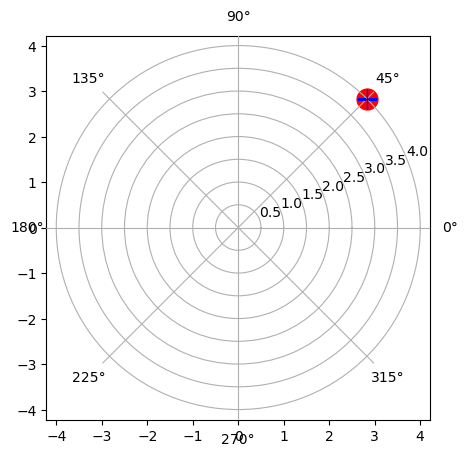

In [94]:
fig = plt.figure()

ax_cart = fig.add_axes([.1, .1, .8, .8])
ax_polr = fig.add_axes([.1, .1, .8, .8], polar=True, frameon=False)

ax_polr.plot(theta, radius, 'b+', markersize=15)
ax_cart.plot([x], [y], 'ro', markersize=15)

r = ax_polr.get_rmax()

ax_cart.set_xlim([-r, r])
ax_cart.set_ylim([-r, r])
ax_cart.set_aspect(1/ax_cart.get_data_ratio())

plt.show()

In [95]:
# Parameterized gaussian

def gaussian(amplitude, sigma, offset):
    num = amplitude
    den = sigma * np.sqrt(2 * np.pi)
    mul = num / den
    
    return lambda x: mul * np.exp((-(x-offset)**2)/(2*sigma*sigma))

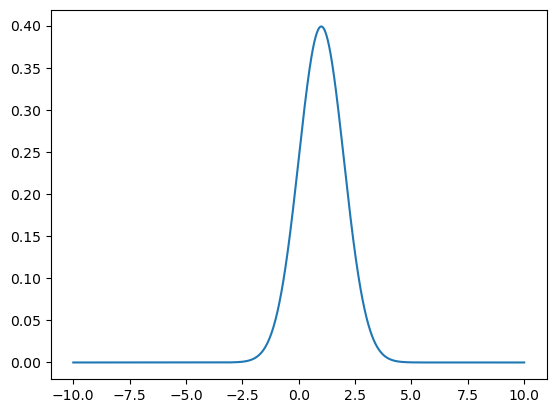

In [96]:
x = np.linspace(-10, 10, 2001)

func = gaussian(1, 1, 1)
plt.plot(x, func(x))
plt.show()

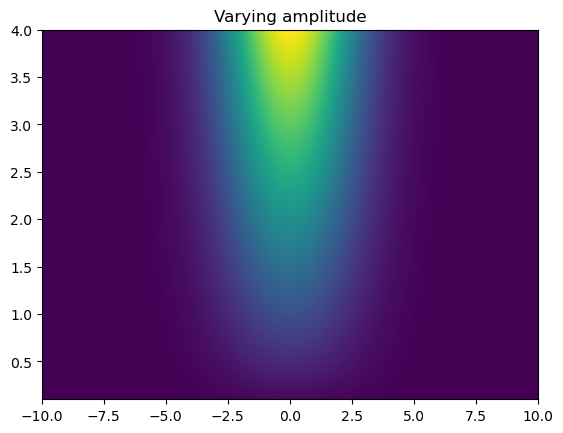

In [97]:
amps = np.linspace(.1,4,100)

data = np.zeros((len(amps), len(x)))
for i in range(len(amps)):
    gaussianFunction = gaussian(amps[i], 2, 0)
    data[i,:] = gaussianFunction(x)

plt.imshow(data, aspect='auto', extent=[x[0], x[-1], amps[0], amps[-1]], origin='lower')
plt.title('Varying amplitude')

plt.show()

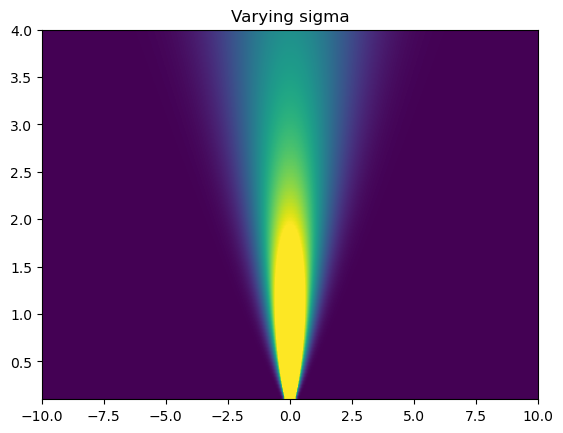

In [98]:
sigmas = np.linspace(.1,2,100)

data = np.zeros((len(sigmas), len(x)))
for i in range(len(sigmas)):
    gaussianFunction = gaussian(5, sigmas[i], 0)
    data[i,:] = gaussianFunction(x)

plt.imshow(data, aspect='auto', extent=[x[0], x[-1], amps[0], amps[-1]], origin='lower', vmax=2)
plt.title('Varying sigma')

plt.show()

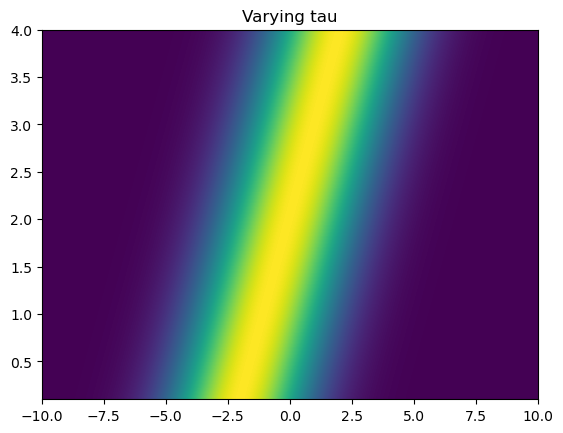

In [99]:
taus = np.linspace(-2,2,100)

data = np.zeros((len(taus), len(x)))
for i in range(len(taus)):
    gaussianFunction = gaussian(5, 2, taus[i])
    data[i,:] = gaussianFunction(x)

plt.imshow(data, aspect='auto', extent=[x[0], x[-1], amps[0], amps[-1]], origin='lower')
plt.title('Varying tau')

plt.show()

In [100]:
# Time dilation

kph = np.zeros(6)
kph[0] = 100    # Car oh highway
kph[1] = 200    # Car on german autobahn
kph[2] = 900    # Airplane
kph[3] = 11300  # Satellite
kph[4] = 107991 # Earth around Sun
kph[5] = 828000 # Sun around galaxy center
labels = ['Highway', 'Autobahn', 'Plane', 'Satellite', 'Earth', 'Sun']

c = 299_792_458
timeDilation = lambda v: 1 / np.sqrt( 1-((v**2)/(c**2)) )

In [101]:
td = timeDilation(kph / 3.6)
print(td)

[1.         1.         1.         1.         1.00000001 1.00000029]


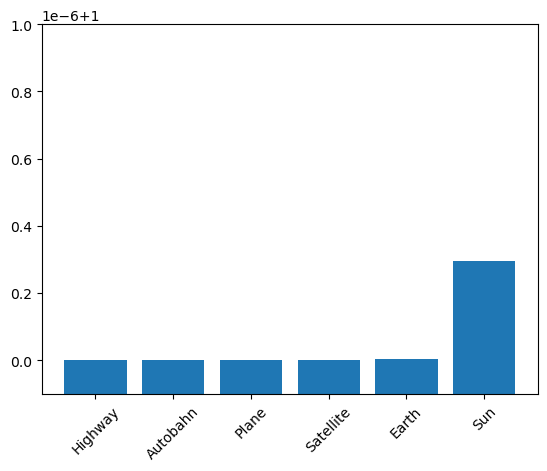

In [105]:
plt.bar(range(len(td)), td)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
plt.ylim([.9999999, 1.000001])
plt.show()